## Observations and Insights

## Dependencies and starter code

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_mouse_study_df=pd.merge(study_results,mouse_metadata,on="Mouse ID")
merged_mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [154]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Creating base dataframe
summary_statistics_df=merged_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().to_frame()
#Renaming column to the corresponding grouping value
summary_statistics_df=summary_statistics_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})
#Adding the rest of the columns
summary_statistics_df["Median Tumor Volume"]=merged_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median().to_frame()["Tumor Volume (mm3)"]
summary_statistics_df["Tumor Volume Variance"]=merged_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var().to_frame()["Tumor Volume (mm3)"]
summary_statistics_df["Tumor Volume Std. Dev."]=merged_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std().to_frame()["Tumor Volume (mm3)"]
summary_statistics_df["Variance Tumor Std. Err."]=merged_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem().to_frame()["Tumor Volume (mm3)"]

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Variance Tumor Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

<IPython.core.display.Javascript object>


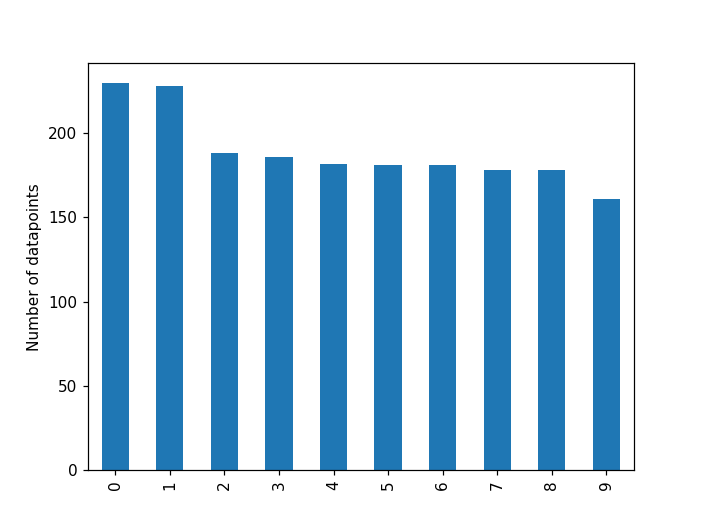

In [157]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_chart_data=merged_mouse_study_df.groupby(["Drug Regimen"])["Mouse ID"].count().to_frame()
bar_chart_data=bar_chart_data.rename(columns={"Mouse ID":"Treatments Count"})
bar_chart_data=bar_chart_data.sort_values(["Treatments Count"], ascending=False)
bar_chart_data=bar_chart_data.reset_index()
bar_chart_data.plot(kind="bar")
plt.ylabel("Number of datapoints")
plt.legend().remove()

In [156]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


<IPython.core.display.Javascript object>


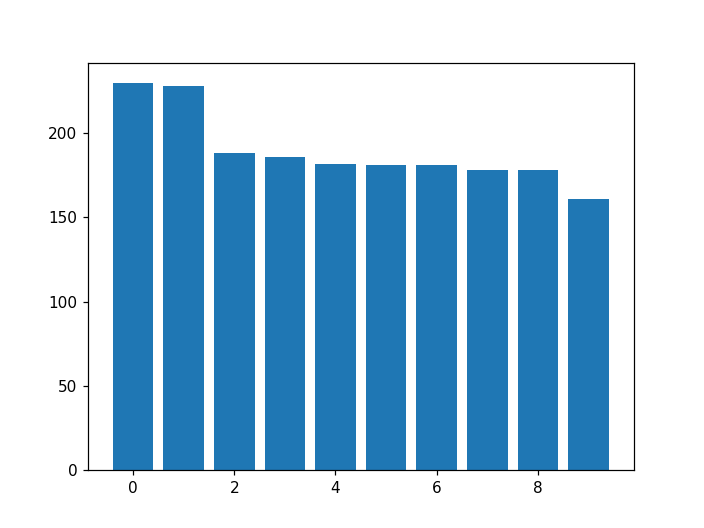

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,Drug Regimen,Treatments Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,161


In [152]:
x_axis=[value for value in range(0,len(bar_chart_data))]
ticks=[value for value in bar_chart_data["Drug Regimen"]]
y_axis=bar_chart_data["Treatments Count"]

plt.bar(x_axis,y_axis)
#plt.xticks(x_axis,bar_chart_data["Drug Regimen"])
plt.show()
print(x_axis)
bar_chart_data

## Pie plots

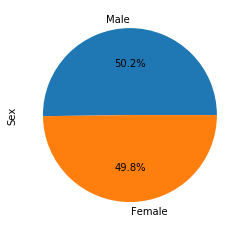

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

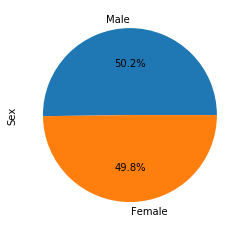

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

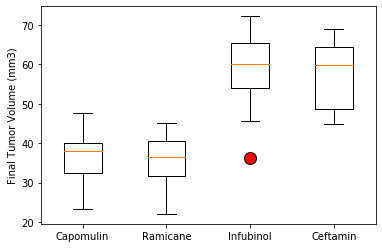

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

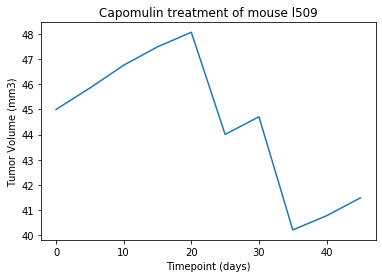

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

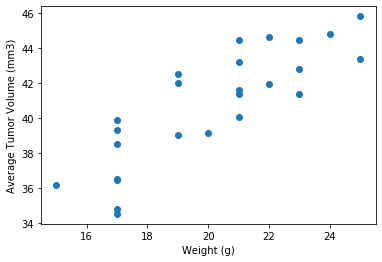

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

The correlation between mouse weight and the average tumor volume is 0.84


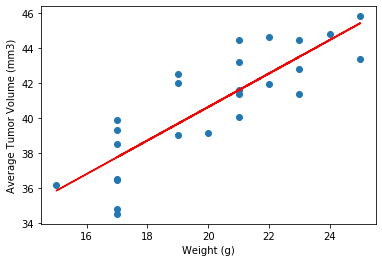

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen